# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks



In [3]:
inputs = json_tricks.load('inputs/inputs.json')
answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [4]:
for one_input in inputs:
    print(ln.lovely(one_input['X']))

array[2, 2] i64 n=4 x∈[-10, 5] μ=-2.500 σ=6.185 [[2, 5], [-10, -7]]
array[5, 2] i64 n=10 x∈[-9, 9] μ=-1.500 σ=5.784 [[-7, -3], [-1, 9], [8, -6], [-4, 2], [-9, -4]]
array[9, 2] i64 n=18 x∈[-10, 9] μ=2.833 σ=6.039
array[5, 2] i64 n=10 x∈[-10, 8] μ=-2.700 σ=5.900 [[4, -3], [-10, -9], [-1, -10], [0, -7], [1, 8]]
array[9, 2] i64 n=18 x∈[-10, 7] μ=-4.056 σ=4.696
array[9, 2] i64 n=18 x∈[-10, 8] μ=-0.944 σ=5.038
array[9, 2] i64 n=18 x∈[-10, 8] μ=-1.778 σ=6.554
array[4, 2] i64 n=8 x∈[-10, 8] μ=0.500 σ=5.220 [[3, 6], [-3, -1], [-10, 0], [8, 1]]
array[4, 2] i64 n=8 x∈[-8, 8] μ=-2.250 σ=6.741 [[-8, -8], [-7, -7], [8, 4], [-7, 7]]
array[4, 2] i64 n=8 x∈[-9, 4] μ=-1.500 σ=3.905 [[4, -1], [-9, -6], [0, 1], [-2, 1]]
array[4, 2] i64 n=8 x∈[-10, 9] μ=0.500 σ=7.314 [[9, 6], [-10, -10], [-4, 9], [4, 0]]
array[5, 2] i64 n=10 x∈[-8, 6] μ=-1.600 σ=4.673 [[-2, 3], [-8, -7], [-8, 1], [3, 6], [-2, -2]]
array[5, 2] i64 n=10 x∈[-10, 4] μ=-3.000 σ=4.919 [[-2, -8], [-7, 2], [4, -10], [-6, -7], [3, 1]]
array[6, 2] i

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [5]:
def get_length(X):
    res = np.linalg.norm(X, axis=1)
    return res

In [6]:
answers['lengths'] = [
    get_length(**inp) for inp in inputs
]

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [7]:
def get_directions(X):
    norm = np.linalg.norm(X, axis=1, keepdims=True)
    epsilon = 1e-8
    res = X / (norm + epsilon)

    return res

In [8]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

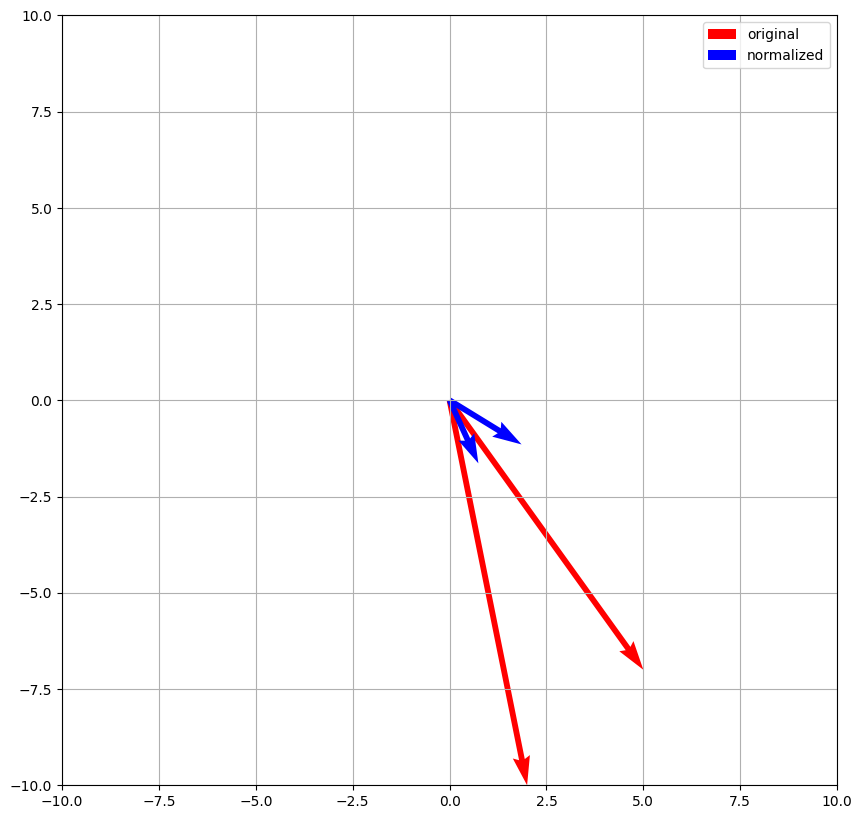

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['directions'][0] * 2
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# Task 4. Scalar Product

Write a function that calculates
- cosine distance between the vectors
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [10]:
def get_cosine(X):
  dot_product = np.dot(X[0], X[1])
  norm_product = np.linalg.norm(X[0]) * np.linalg.norm(X[1])
  res = dot_product / (norm_product + 1e-8)
  return res

In [11]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]

# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [ ]:
def get_orthonormal(X):
    res = X.copy().astype('float32')
    
    # Normalize the first vector (v1)
    v1 = res[0]
    v1_norm = np.linalg.norm(v1)
    v1_normalized = v1 / (v1_norm + 1e-8)  # Same epsilon as get_directions
    
    # Make second vector (v2) orthogonal to v1
    v2 = res[1]
    # Project v2 onto v1 and subtract (Gram-Schmidt)
    proj = np.dot(v2, v1_normalized) * v1_normalized
    v2_orthogonal = v2 - proj
    
    # Normalize the orthogonalized v2
    v2_norm = np.linalg.norm(v2_orthogonal)
    v2_normalized = v2_orthogonal / (v2_norm + 1e-8)
    
    res[0] = v1_normalized
    res[1] = v2_normalized
    
    return res

In [13]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

# 6. Visualization

[[  2   5]
 [-10  -7]]
[[  4.  10.]
 [-20. -14.]]


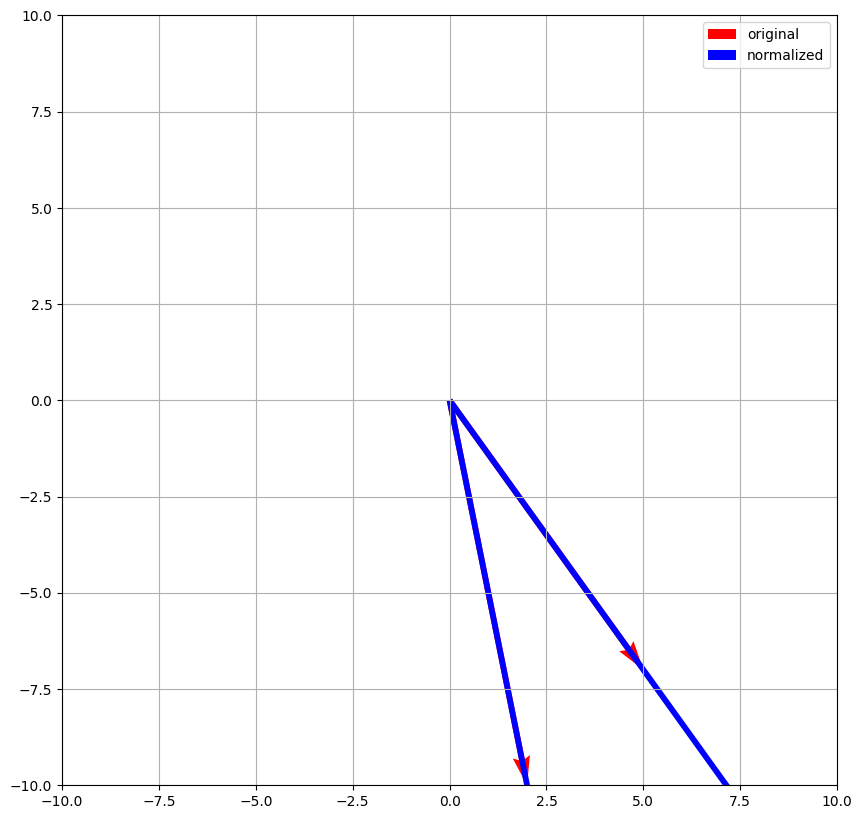

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0] * 2
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()

# 7. Saving the answer

In [ ]:
json_tricks.dump(answers, '.answer.json')